In [ ]:

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Import dataset
re=pd.read_csv("realest.csv")

In [ ]:
re.head()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
0,53.0,2.0,967.0,5.0,39.0,652.0,1.5,0.0,0.0
1,55.0,2.0,815.0,5.0,33.0,1000.0,1.0,2.0,1.0
2,56.0,3.0,900.0,5.0,35.0,897.0,1.5,1.0,0.0
3,58.0,3.0,1007.0,6.0,24.0,964.0,1.5,2.0,0.0
4,64.0,3.0,1100.0,7.0,50.0,1099.0,1.5,1.5,0.0


In [10]:

re.info()


<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 0 to 155
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      128 non-null    float64
 1   Bedroom    128 non-null    float64
 2   Space      128 non-null    float64
 3   Room       128 non-null    float64
 4   Lot        128 non-null    float64
 5   Tax        128 non-null    float64
 6   Bathroom   128 non-null    float64
 7   Garage     128 non-null    float64
 8   Condition  128 non-null    float64
dtypes: float64(9)
memory usage: 10.0 KB


In [11]:

re.describe()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,56.718750,3.195312,1109.382812,6.531250,32.664062,925.476562,1.488281,0.812500,0.226562
std,13.348708,1.392096,480.844011,1.724933,8.630907,435.174559,0.548674,0.810852,0.420252
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,809.750000,5.000000,25.000000,679.750000,1.000000,0.000000,0.000000
50%,56.000000,3.000000,963.500000,6.000000,30.000000,855.500000,1.500000,1.000000,0.000000
75%,64.000000,4.000000,1199.500000,7.000000,35.500000,1039.750000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [12]:
pd.isnull(re).sum()
# checking null value

,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


In [13]:
re.dropna(inplace=True)
# droping null values


pd.isnull(re).sum()


,0
Price,0
Bedroom,0
Space,0
Room,0
Lot,0
Tax,0
Bathroom,0
Garage,0
Condition,0


In [14]:

re.dtypes

,0
Price,float64
Bedroom,float64
Space,float64
Room,float64
Lot,float64
Tax,float64
Bathroom,float64
Garage,float64
Condition,float64


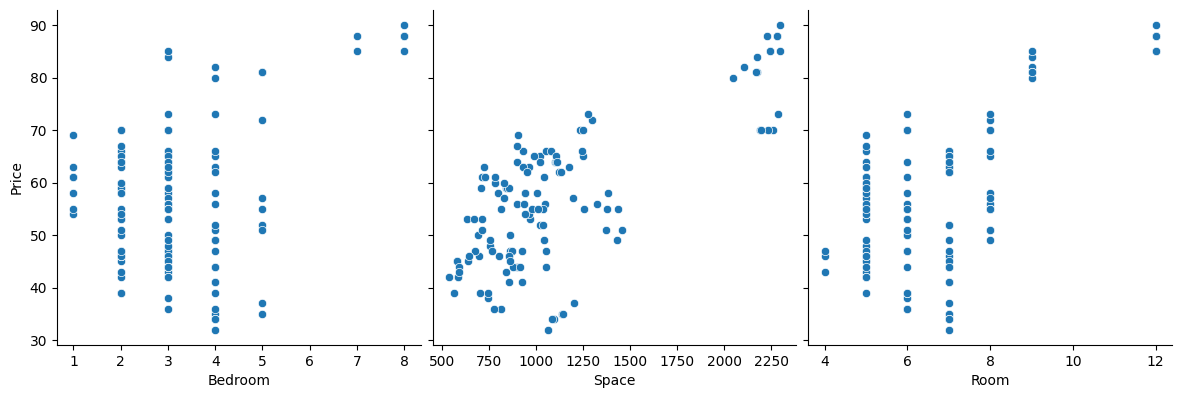

In [15]:
# Pairplot
sns.pairplot(re,x_vars=['Bedroom','Space','Room'],y_vars=['Price'],size=4,aspect=1,kind='scatter')
# Pairplot is usually used to plot when we want to know correlation in terms of positive, negative or no-correlation
# target variable is Price(y), we are comparing price with bedroom, space and room to see who is more correlated(positively correlated)
# aspect = ratio
# Space = positive corelation


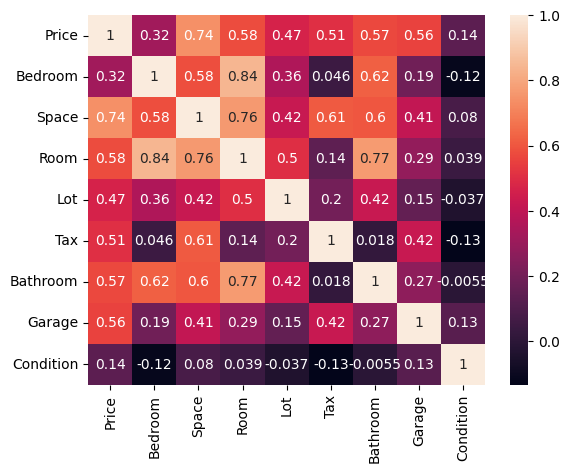

In [16]:
# Heatmap
sns.heatmap(re.corr(),annot=True)
plt.show()
# heatmap plots co-relation with numbers and colors
# heatmap- light color for negative corr and dark for +ve corr
# Space is more correlated with Credit amount , so its our indepedant var


In [17]:
x=re['Space'].values
y=re['Price'].values


X=x.reshape(-1,1)
X

array([[ 967.],
       [ 815.],
       [ 900.],
       [1007.],
       [1100.],
       [ 897.],
       [2261.],
       [2104.],
       [2240.],
       [ 641.],
       [ 862.],
       [1043.],
       [1325.],
       [ 782.],
       [1126.],
       [ 929.],
       [1137.],
       [ 743.],
       [ 803.],
       [ 696.],
       [ 691.],
       [1023.],
       [ 964.],
       [ 799.],
       [ 943.],
       [1041.],
       [1124.],
       [ 855.],
       [2230.],
       [1299.],
       [2173.],
       [2278.],
       [ 583.],
       [ 874.],
       [1053.],
       [1255.],
       [ 785.],
       [1104.],
       [1250.],
       [ 898.],
       [1142.],
       [ 812.],
       [ 539.],
       [ 758.],
       [ 636.],
       [1053.],
       [ 828.],
       [ 839.],
       [1049.],
       [ 880.],
       [1458.],
       [2191.],
       [1233.],
       [2171.],
       [2295.],
       [ 581.],
       [ 924.],
       [1021.],
       [1379.],
       [ 715.],
       [1243.],
       [ 907.],
       [

In [18]:

#Train_test_split¶
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [19]:
X_train.shape

(89, 1)

y_test.shape

(39,)

In [20]:

#Building a linear model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [21]:
ypred=lr.predict(X_test)
ypred


array([55.11961598, 52.75962602, 56.49270104, 60.16141271, 52.9527161 ,
       54.69052689, 51.17199641, 56.64288222, 55.07670707, 79.74932938,
       56.42833768, 80.58605309, 60.61195625, 48.23273618, 79.85660165,
       51.19345086, 62.13522249, 51.49381322, 45.25056705, 54.64761798,
       81.59441244, 57.05051685, 45.29347596, 59.66796026, 50.16363706,
       55.33416052, 56.85742677, 81.80895698, 76.61697907, 49.41273116,
       54.00398436, 54.94798034, 51.17199641, 49.00509653, 48.70473418,
       53.4247141 , 53.72507645, 51.98726567, 49.5843668 ])

In [22]:

#Calculating r2
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,ypred)
r_squared

0.5100691257265606

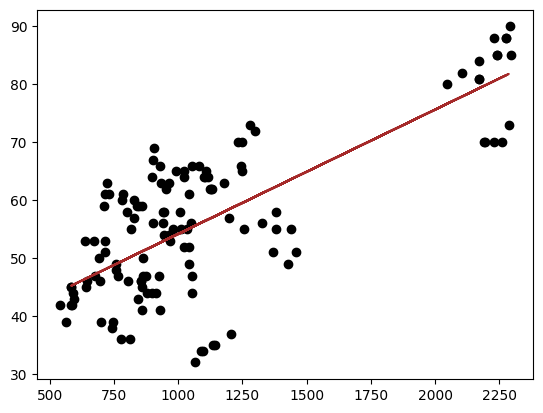

In [23]:
#Visualizing the fit on test data
plt.scatter(re['Space'],re['Price'],color='Black')
plt.plot(X_test,ypred,color='Brown')
plt.show()